In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/images", # путь к изображениям
    validation_split=0.2, # процент на тест
    subset="both", # берем и обучающую и тестовую выборку
    seed=42, # сид генератора случайных чисел
    image_size=(200,400), # целевой размер изображения (СНАЧАЛА ВЫСОТА, ПОТОМ ШИРИНА)
    batch_size=32, # размер пакета (батча)
)

Found 2010 files belonging to 2 classes.
Using 1608 files for training.
Using 402 files for validation.


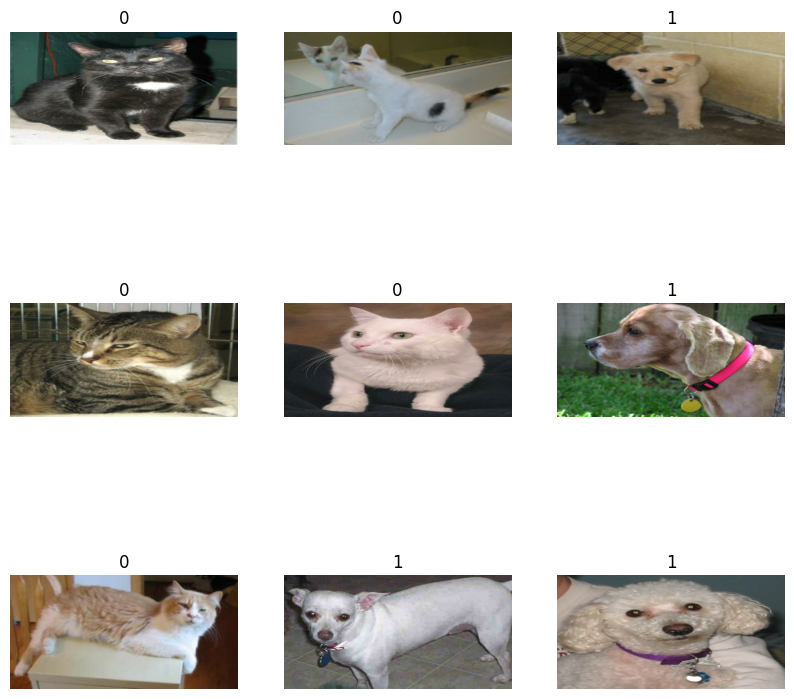

In [ ]:
plt.figure(figsize=(10, 10))
# берем один батч
for images, labels in train_ds.take(1):
    # отрисуем 9 картинок из батча
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # выводим картинку
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        # выключаем оси (чтобы они не отображались)
        plt.axis("off")

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomContrast(0.5),
        tf.keras.layers.RandomZoom(0.2)
    ]
)

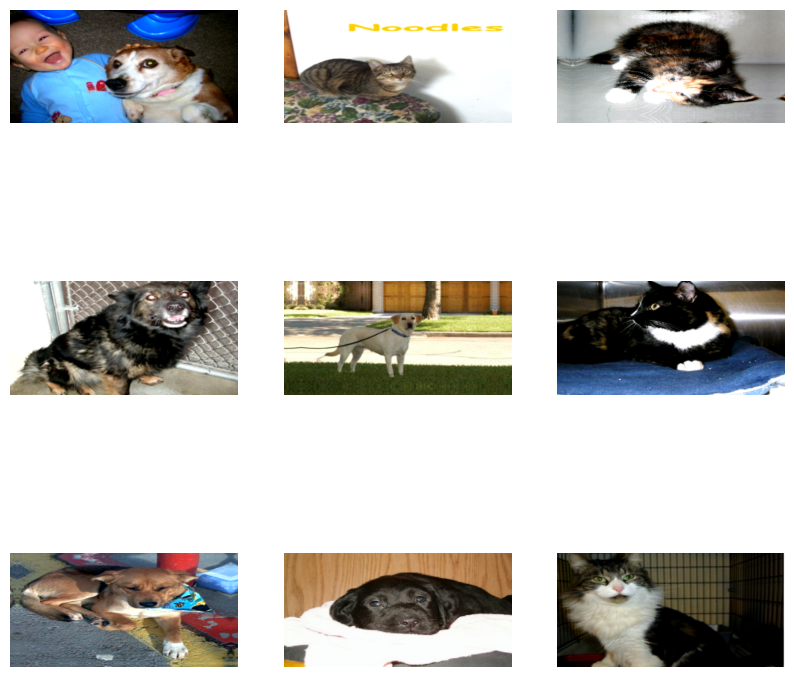

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)

In [ ]:
inputs = tf.keras.Input(shape=(200, 400, 3))
# преобразуем значения пикселей из [0, 255] к [0, 1]
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
x = tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(3, padding="same")(x)
x = tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(3, padding="same")(x)
# выпрямляем многомерный массив
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 200, 400, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 200, 400, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_190 (Conv2D)             │ (None, 200, 400, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 67, 134, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_191 (Conv2D)             │ (None, 67, 134, 32)    │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 23, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 33120)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │     2,119,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,140,130 (8.16 MB)

 Trainable params: 2,140,130 (8.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_ds, epochs=20, validation_data=test_ds)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 237s 5s/step - accuracy: 0.5398 - loss: 1.3844 - val_accuracy: 0.4502 - val_loss: 0.6985
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 236s 5s/step - accuracy: 0.4768 - loss: 0.6945 - val_accuracy: 0.4577 - val_loss: 0.6926
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.5012 - loss: 0.6919 - val_accuracy: 0.6393 - val_loss: 0.6309
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.5546 - loss: 0.6866 - val_accuracy: 0.4925 - val_loss: 0.6835
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.5345 - loss: 0.6669 - val_accuracy: 0.5647 - val_loss: 0.6467
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.5847 - loss: 0.6435 - val_accuracy: 0.5398 - val_loss: 0.6955
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 235s 5s/step - accuracy: 0.6034 - loss: 0.6445 - val_accuracy: 0.6791 - val_loss: 0.5798
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.6383 - loss: 0.6060 - val_accuracy: 0.6716 - v

In [ ]:
loss, accuracy = model.evaluate(test_ds)
accuracy

13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7497 - loss: 0.5709


0.7388059496879578

In [ ]:
img = tf.keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/images/cats/323.jpg", target_size=(200, 400)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[0.99023366, 0.00976631]], dtype=float32)

In [ ]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/images_2", # путь к изображениям
    validation_split=0.2, # процент на тест
    subset="both", # берем и обучающую и тестовую выборку
    seed=42, # сид генератора случайных чисел
    image_size=(224,224), # целевой размер изображения (СНАЧАЛА ВЫСОТА, ПОТОМ ШИРИНА)
    batch_size=32, # размер пакета (батча)
)

Found 115 files belonging to 3 classes.
Using 92 files for training.
Using 23 files for validation.


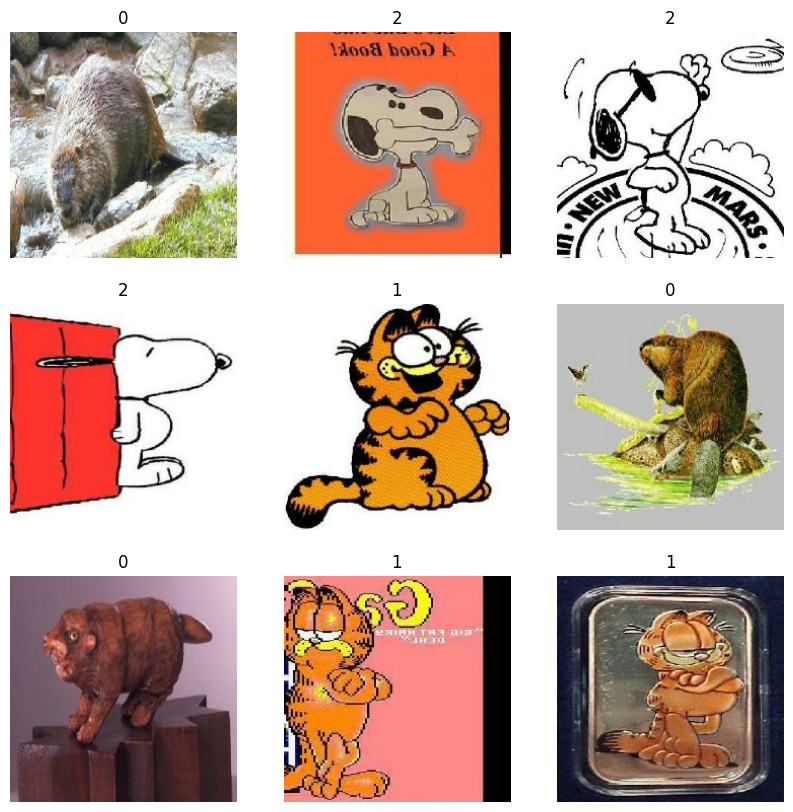

In [ ]:
plt.figure(figsize=(10, 10))
# берем один батч
for images, labels in train_ds.take(1):
    # отрисуем 9 картинок из батча
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # выводим картинку
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        # выключаем оси (чтобы они не отображались)
        plt.axis("off")

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomContrast(0.5),
        tf.keras.layers.RandomZoom(0.2)
    ]
)

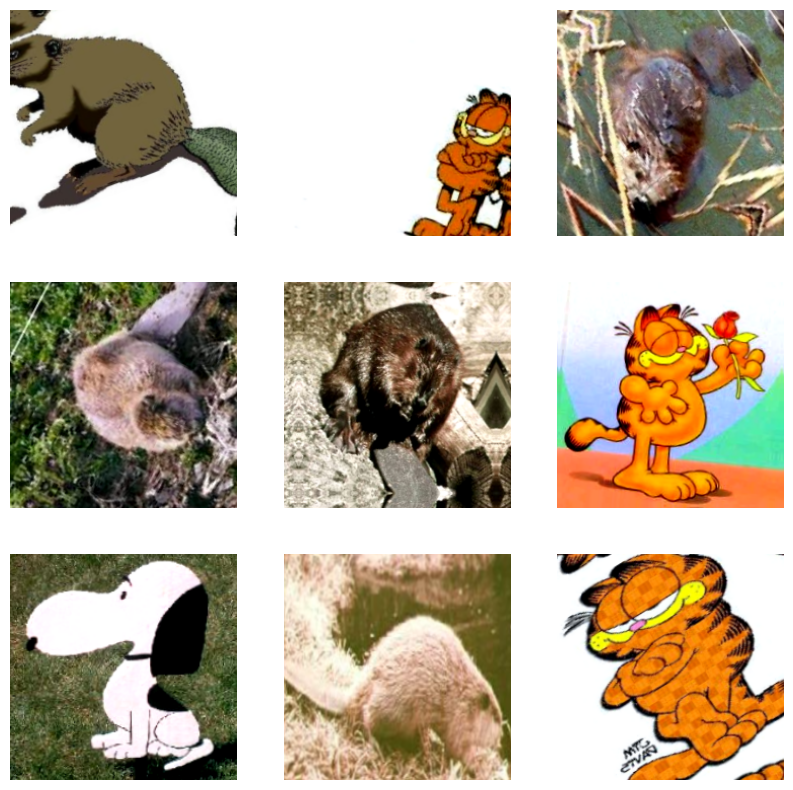

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)

In [ ]:
vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# сохраним ссылку на входной слой сети
inp = vgg.input

# создадим новый слой классификации по нашему количеству классов
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')

# соединим предпоследний слой VGG и наш новый слой классификации
out = new_classification_layer(vgg.layers[-2].output)

# создадим новую модель
model_new = tf.keras.Model(inp, out)

In [ ]:
model_new.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 139,582,531 (532.47 MB)

 Trainable params: 139,582,531 (532.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_new.trainable = True
for layer in model_new.layers[:-5]:
    layer.trainable = False

In [ ]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_vgg = model_new.fit(train_ds, epochs=20, validation_data=test_ds)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 101s 35s/step - accuracy: 0.4750 - loss: 28.9338 - val_accuracy: 0.3478 - val_loss: 259.6978
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 141s 35s/step - accuracy: 0.5778 - loss: 113.4199 - val_accuracy: 0.8261 - val_loss: 2.2134
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 95s 34s/step - accuracy: 0.7531 - loss: 4.6039 - val_accuracy: 0.9565 - val_loss: 0.0799
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 142s 34s/step - accuracy: 0.9392 - loss: 1.5974 - val_accuracy: 1.0000 - val_loss: 0.0288
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 145s 35s/step - accuracy: 0.9946 - loss: 0.0858 - val_accuracy: 0.9565 - val_loss: 0.6146
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 142s 35s/step - accuracy: 0.9626 - loss: 0.5281 - val_accuracy: 0.8696 - val_loss: 0.9294
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 100s 36s/step - accuracy: 0.9377 - loss: 0.4662 - val_accuracy: 0.9565 - val_loss: 0.7898
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 141s 35s/step - accuracy: 0.9735 - loss: 0.0805 - val_accuracy: 0.9565 - val_l

In [ ]:
img = tf.keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/images_2/beaver/image_0008.jpg", target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new.predict(img_array)

In [ ]:
predicted_class = np.argmax(predictions, axis=-1)
predicted_class

array([0])

In [ ]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/images_2", # путь к изображениям
    validation_split=0.2, # процент на тест
    subset="both", # берем и обучающую и тестовую выборку
    seed=42, # сид генератора случайных чисел
    image_size=(299,299), #InceptionV3 работает с изображениями 299x299
    batch_size=32, # размер пакета (батча)
)

Found 115 files belonging to 3 classes.
Using 92 files for training.
Using 23 files for validation.


In [ ]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)

In [ ]:
inception = tf.keras.applications.InceptionV3(weights='imagenet')
inception.summary()


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_11[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_193 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_193[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_194 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_194[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 73, 73,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_195 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_12… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_195[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_196 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_196[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
# сохраним ссылку на входной слой сети
inp = inception.input

# создадим новый слой классификации по нашему количеству классов
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')

# соединим предпоследний слой inception и наш новый слой классификации
out = new_classification_layer(inception.layers[-2].output)

# создадим новую модель
model_new = tf.keras.Model(inp, out)

In [ ]:
model_new.trainable = True
for layer in model_new.layers[:-5]:
    layer.trainable = False

In [ ]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_inception = model_new.fit(train_ds, epochs=20, validation_data=test_ds)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 12s/step - accuracy: 0.1440 - loss: 15.9996 - val_accuracy: 0.1739 - val_loss: 16.2459
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 13s/step - accuracy: 0.2835 - loss: 13.2594 - val_accuracy: 0.2609 - val_loss: 7.2204
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 10s/step - accuracy: 0.3106 - loss: 8.3711 - val_accuracy: 0.3478 - val_loss: 5.4888
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 11s/step - accuracy: 0.4220 - loss: 6.2189 - val_accuracy: 0.3913 - val_loss: 6.0128
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 13s/step - accuracy: 0.4750 - loss: 4.2245 - val_accuracy: 0.4783 - val_loss: 4.2263
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 13s/step - accuracy: 0.6121 - loss: 2.8713 - val_accuracy: 0.5652 - val_loss: 3.3511
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 13s/step - accuracy: 0.6073 - loss: 2.9281 - val_accuracy: 0.6087 - val_loss: 2.8762
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 10s/step - accuracy: 0.7018 - loss: 2.9715 - val_accuracy: 0.6957 - val_loss: 2.80

In [ ]:
img = tf.keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/images_2/beaver/image_0008.jpg", target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)

predictions = model_new.predict(img_array)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[0.01974708, 0.85394835, 0.12630454]], dtype=float32)

In [ ]:
predicted_class = np.argmax(predictions, axis=-1)
predicted_class

array([1])

In [ ]:
table = pd.DataFrame({
    "Epoch": range(1, len(history_inception.history['accuracy']) + 1),
    "InceptionV3_accuracy": history_inception.history['val_accuracy'],
    "VGG19_accuracy": history_vgg.history['val_accuracy'],
})
table = table.set_index("Epoch")
table

,InceptionV3_accuracy,VGG19_accuracy
Epoch,,
1,0.173913,0.347826
2,0.260870,0.826087
3,0.347826,0.956522
4,0.391304,1.000000
5,0.478261,0.956522
6,0.565217,0.869565
7,0.608696,0.956522
8,0.695652,0.956522
9,0.608696,0.913043


from matplotlib import pyplot as plt
table['InceptionV3_accuracy'].plot(kind='hist', bins=20, title='InceptionV3_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
table['VGG19_accuracy'].plot(kind='hist', bins=20, title='VGG19_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
table.plot(kind='scatter', x='InceptionV3_accuracy', y='VGG19_accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
table['InceptionV3_accuracy'].plot(kind='line', figsize=(8, 4), title='InceptionV3_accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
table['VGG19_accuracy'].plot(kind='line', figsize=(8, 4), title='VGG19_accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)